# Analysis and plotting of spatial data

Based on : Alex Gossart and Alena Malyarenko- Antarctic Science Platform Modelling School 2021

Adapted by Alena Malyarenko - 2024

In [1]:
%pip install cmcrameri

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://artifactory.vgt.vito.be/api/pypi/python-packages/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.4/277.4 kB 222.0 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: /opt/conda/envs/baseline/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install nc-time-axis

Large ocean and atmosphere datates typically come as 4-D arrays: lon, lat, depth/height, time.

When plotting 2-D surfaces, any of the 2 dimentions can be chosen.

Map - lon/lat
Section across the globe - lat / depth 
Sesonal cycle at specific location - time/depth

* Import libraries to work with the dataset

/tmp/ipykernel_1162137/2295458410.py:21: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = ncfile.variables['thetao'][0,0,:,:]


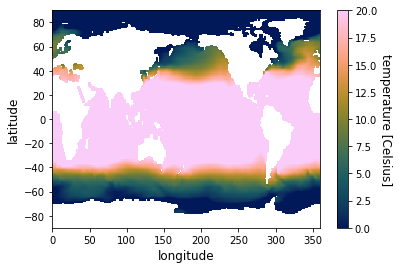

In [1]:
import numpy as np  # This will import the python numerical
# library. It can be utilised to perform a number of 
# mathematical operations on arrays such as trigonometric, 
# statistical, and algebraic routines.

from netCDF4 import Dataset # This will enable to read in 
# netcdf datasets.

import matplotlib.pyplot as plt # This is an interface to 
# provide a MATLAB-like way of plotting

from cmcrameri import cm
# Scientific colormaps https://www.nature.com/articles/s41467-020-19160-7

ftsize=12

# read in the data
filename='thetao_Omon_CESM2_historical_r1i1p1f1_gr_201301-201412.nc' 
ncfile = Dataset(filename)

var = ncfile.variables['thetao'][0,0,:,:]
lat = ncfile.variables['lat']
lon = ncfile.variables['lon']


## make a mask

#var= np.ma.MaskedArray(var,mask=[(a>10) for a in var])

# create a mesh grid
#Lon,Lat=np.meshgrid(lon,lat)
#var= np.ma.MaskedArray(var,mask=[(a>10) for a in Lat])


#plot

plt.pcolor(lon,lat,var,cmap=cm.batlow)

# add axes labels
plt.xlabel('longitude',fontsize = ftsize)
plt.ylabel('latitude',fontsize = ftsize)

# colorbar
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('temperature [Celsius]',fontsize = ftsize,rotation=270)
plt.clim(0,20)


plt.show()

/tmp/ipykernel_1162137/1472438462.py:7: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = ncfile.variables['thetao'][0,:,:,180]


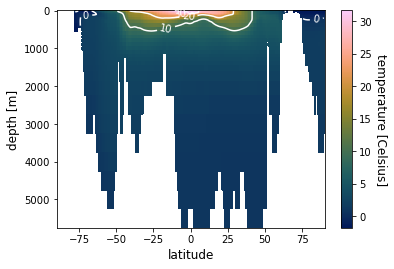

In [2]:
ftsize=12

# read in the data
filename='thetao_Omon_CESM2_historical_r1i1p1f1_gr_201301-201412.nc' 
ncfile = Dataset(filename)

var = ncfile.variables['thetao'][0,:,:,180]
level = ncfile.variables['lev']
lat = ncfile.variables['lat']

# create a mesh grid
Lat,Level=np.meshgrid(lat,level);

#plot
plot=plt.pcolor(Lat,Level,var,cmap=cm.batlow)
cont=plt.contour(Lat,Level,var,[0,10,20,30],colors='w')
plt.clabel(cont,fmt='%d',inline=1)

# revert axes
ax = plot.axes
ax.invert_yaxis()

# add axes labels
plt.xlabel('latitude',fontsize = ftsize)
plt.ylabel('depth [m]',fontsize = ftsize)

# colorbar

cbar = plt.colorbar(plot)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('temperature [Celsius]',fontsize = ftsize,rotation=270)

plt.show()

/tmp/ipykernel_1162137/2739468308.py:7: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = ncfile.variables['thetao'][:,:,45,180]  # select one location, all levels and timesteps


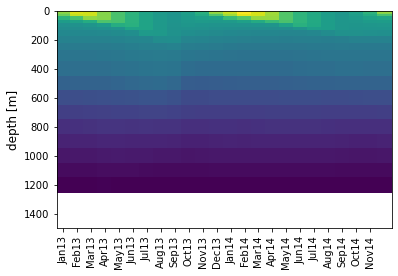

In [3]:
ftsize=12

# read in the data
filename='thetao_Omon_CESM2_historical_r1i1p1f1_gr_201301-201412.nc' 
ncfile = Dataset(filename)

var = ncfile.variables['thetao'][:,:,45,180]  # select one location, all levels and timesteps
level = ncfile.variables['lev']
lat = ncfile.variables['lat']
time = ncfile.variables['time']

# to match time X levels
var=np.transpose(var)

plot=plt.pcolor(time,level,var)

plt.ylim(0,1500)
ax=plot.axes
ax.invert_yaxis()

# define time labels
x=(time[0:23])

label=['Jan13','Feb13','Mar13','Apr13','May13','Jun13','Jul13','Aug13','Sep13','Oct13','Nov13','Dec13',
'Jan14','Feb14','Mar14','Apr14','May14','Jun14','Jul14','Aug14','Sep14','Oct14','Nov14']

plt.ylabel('depth [m]',fontsize = ftsize)

# plot time ticks

plt.xticks(x,label,rotation='vertical')

plt.show()

How to get report-ready maps? 

* Projection
* Axis Lables
* Plot title 
* Colormap
* Add a dot for your location of interest if needed


ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/envs/baseline/share/proj failed
/tmp/ipykernel_1162137/769101592.py:11: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = ncfile.variables['thetao'][0,0,:,:]


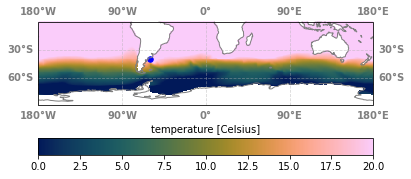

In [4]:
# tool to plot maps
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

ftsize=10

filename='thetao_Omon_CESM2_historical_r1i1p1f1_gr_201301-201412.nc'
ncfile = Dataset(filename)

var = ncfile.variables['thetao'][0,0,:,:]
lat = ncfile.variables['lat']
lon = ncfile.variables['lon']
lev = ncfile.variables['lev']

# get the PlateCarree projection, centered over longitude 0
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0))

# add coastlines
ax.coastlines(color='grey')

# it is  global file, but show only the southern hemisphere
ax.set_extent([-180, 180, -90, 0], ccrs.PlateCarree())


# create a mesh grid
Lon,Lat=np.meshgrid(lon,lat);

# plot the variable (+ *fancy* colormap)
plt.pcolor(Lon,Lat,var,transform=ccrs.PlateCarree(),cmap=cm.batlow)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')


# add axes labels
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# choose where to put the ticks
gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])
gl.ylocator = mticker.FixedLocator([0,-30, -60, -90])

# customize the font
gl.xlabel_style = {'color': 'grey', 'weight': 'bold'}
gl.ylabel_style = {'color': 'grey', 'weight': 'bold'}


# colorbar
cbar = plt.colorbar(orientation='horizontal')
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_title('temperature [Celsius]',fontsize = ftsize)
plt.clim(0,20)

# add the CTD point
plt.scatter(-60,-40,30,color='blue') # 60 W - 40 S

plt.show()

Xarray is a powerful library to use with netCDF files. 

It simplifies the selection of location, levels, times..

/opt/conda/envs/baseline/lib/python3.9/site-packages/xarray/conventions.py:523: SerializationWarning: variable 'thetao' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


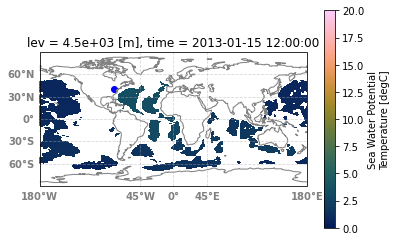

In [5]:
# xarray
import xarray as xr

ftsize=16

filename='thetao_Omon_CESM2_historical_r1i1p1f1_gr_201301-201412.nc'
data=xr.open_dataset(filename)

# get the info on the file to know what to select
# print(data)

theta0=data.thetao.isel(time=0,lev=30)
point =data.thetao.sel(time="2013-01",lat=-79.5,lon=40.5,lev=400)


# get the PlateCarree projection, centered over longitude 0
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0))
ax.coastlines(color='grey')
ax.set_global()
plot=theta0.plot.pcolormesh(ax=ax,transform=ccrs.PlateCarree(), x='lon', 
    y='lat', cmap=cm.batlow,vmin=0,vmax=20)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


# choose where to put the ticks
gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.ylocator = mticker.FixedLocator([90,60,30,0,-30, -60, -90])
gl.top_labels = False
gl.right_labels = False
# customize the font
gl.xlabel_style = {'color': 'grey', 'weight': 'bold'}
gl.ylabel_style = {'color': 'grey', 'weight': 'bold'}

# add the CTD point
plt.scatter(point.lat,point.lon,color='blue') # 60 W - 40 S

plt.show()

In orfer to compare 2 datasets on a different grid, one has to be interpolated onto another. 


In [ ]:

# interpolation tool
from scipy.interpolate import griddata
import matplotlib.colors as colors


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# function to center around zero:

class MidpointNormalize(colors.Normalize):
	def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
		self.midpoint = midpoint
		colors.Normalize.__init__(self, vmin, vmax, clip)

	def __call__(self, value, clip=None):
		x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
		return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

ftsize=20
ftsize2=15

filename_cmip='thetao_Omon_CESM2_historical_r1i1p1f1_gr_201301-201412.nc'
filename_era5='SST_ERA5_201301.nc'

ncfile_cmip = Dataset(filename_cmip)
ncfile_era5 = Dataset(filename_era5)

var_cmip = ncfile_cmip.variables['thetao'][0,0,:,:]
lat_cmip = ncfile_cmip.variables['lat']; lat_cmip=np.array(lat_cmip)
lon_cmip = ncfile_cmip.variables['lon']; lon_cmip=np.array(lon_cmip)

var_era5= ncfile_era5.variables['sst'][0,:,:]-273.15
lat_era5 = ncfile_era5.variables['latitude']; lat_era5=np.array(lat_era5)
lon_era5 = ncfile_era5.variables['longitude'];lon_era5=np.array(lon_era5)

# the latitude/longitude variables are 1D and we need 2D: use meshgrid

grid_lon_era5,grid_lat_era5 = np.meshgrid(lon_era5,lat_era5)
grid_lon_cmip,grid_lat_cmip = np.meshgrid(lon_cmip,lat_cmip)

# the latitude/longitude coordinates should be in the shape(2,N): use ".ravel()" to get all the points from 2D to 1D 
# and "stack" to glue them together

points_cmip= np.stack([grid_lat_cmip.ravel(), grid_lon_cmip.ravel()], -1)

# now we can interpolate, using griddata
# the input is
#  - points: the (2,N) grid of points to interpolate 
#  - theta: the values to interpolate (as one long array, using .ravel())
#  - (grid_latera,grid_longera): the two 2D coordinates of the grid we interpolate into 

var_cmip_regridded = griddata(points_cmip, var_cmip.ravel(), (grid_lat_era5,grid_lon_era5),method='nearest')

## make a mask
var_cmip_regridded= np.ma.MaskedArray(var_cmip_regridded,mask=[(a>35) for a in var_cmip_regridded])

# plot using subplots:

# subplot1 
fig=plt.figure(figsize=(12,12))

# add cartopy arguments:
A=fig.add_subplot(3,1,1,projection=ccrs.PlateCarree())
A.coastlines(color='grey')
A.set_extent([-180,180,-90,0],ccrs.PlateCarree())
plt.title('ERA5 201301',fontsize=ftsize)
plt.pcolor(grid_lon_era5,grid_lat_era5,var_era5, vmin=-2,vmax=33,transform=ccrs.PlateCarree(),cmap=cm.batlow)

# add axes labels
gl = A.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# choose where to put the ticks
gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])
gl.ylocator = mticker.FixedLocator([0,-45, -90])

# customize the font
gl.xlabel_style = {'color': 'grey'}
gl.ylabel_style = {'color': 'grey'}

# colorbar
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('SST [\xb0 C]',fontsize = ftsize2,rotation=270)

# subplot2
B=fig.add_subplot(3,1,2,projection=ccrs.PlateCarree())
B.coastlines(color='grey')
B.set_extent([-180,180,-90,0],ccrs.PlateCarree())
plt.title('CMIP regridded 201301',fontsize=ftsize)
plt.pcolor(grid_lon_era5,grid_lat_era5,var_cmip_regridded,vmin=-2,vmax=33,transform=ccrs.PlateCarree(),cmap=cm.batlow)

# add axes labels
gl = B.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
# choose where to put the ticks
gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])
gl.ylocator = mticker.FixedLocator([0,-45, -90])
# customize the font
gl.xlabel_style = {'color': 'grey'}
gl.ylabel_style = {'color': 'grey'}

# add colorbar
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('SST [\xb0 C]',fontsize = ftsize2,rotation=270)

# subplot3
C=fig.add_subplot(3,1,3,projection=ccrs.PlateCarree())
C.coastlines(color='grey')
C.set_extent([-180,180,-90,0],ccrs.PlateCarree())
plt.title('Difference (ERA5-CMIP) 201301',fontsize=ftsize)

# add the min, max and centre values for the blue-red colorbar:
mid_val=0; minvar = -13; maxvar = 8;

# plot using the limits
plt.pcolor(grid_lon_era5,grid_lat_era5,var_era5-var_cmip_regridded,transform=ccrs.PlateCarree(),cmap=cm.vik,norm=MidpointNormalize(midpoint=mid_val,vmin=minvar, vmax=maxvar))

# add axes labels
gl = C.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
# choose where to put the ticks
gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])
gl.ylocator = mticker.FixedLocator([0,-45, -90])
# customize the font
gl.xlabel_style = {'color': 'grey'}
gl.ylabel_style = {'color': 'grey'}
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('SST [\xb0 C]',fontsize = ftsize2,rotation=270)

###############

fig.tight_layout(pad=0.3)

plt.savefig('ERA5_CMIP_difference_sst_201301.png')

/tmp/ipykernel_1161930/2110576744.py:29: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var_cmip = ncfile_cmip.variables['thetao'][0,0,:,:]


/tmp/ipykernel_1159544/876702462.py:16: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  june_2013 = ncfile_2013.variables['thetao'][5,:,:,179]
/tmp/ipykernel_1159544/876702462.py:17: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  june_2014 = ncfile_2013.variables['thetao'][17,:,:,179]
/tmp/ipykernel_1159544/876702462.py:18: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  june_1850 = ncfile_1850.variables['thetao'][5,:,:,179]
/tmp/ipykernel_1159544/876702462.py:19: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  june_1851 = ncfile_1850.variables['thetao'][17,:,:,179]


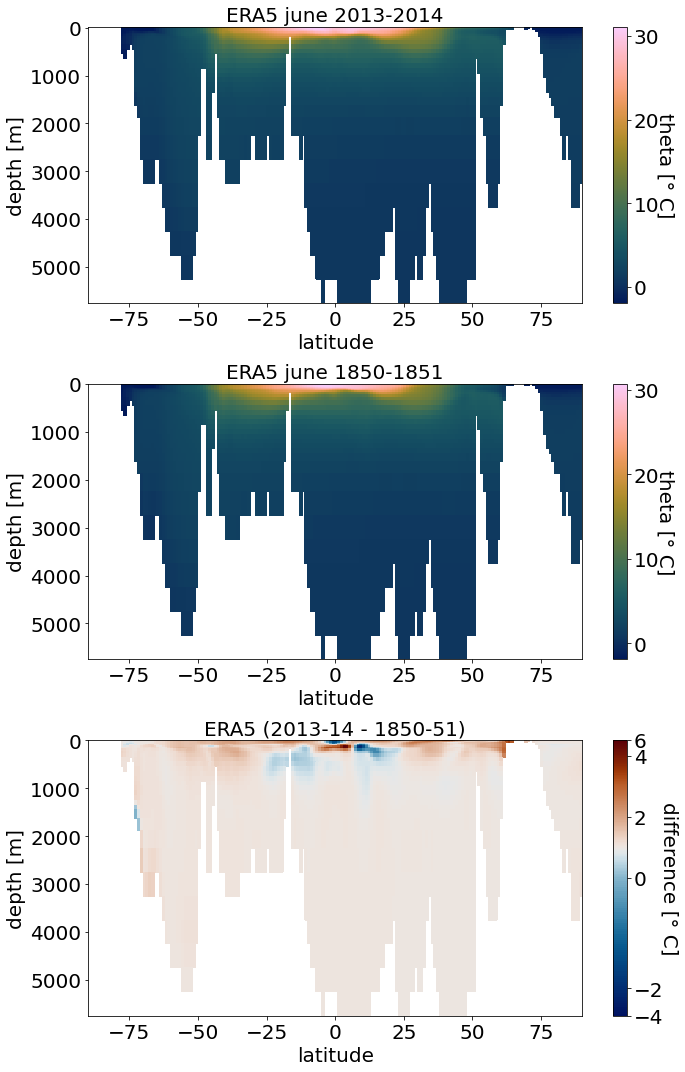

In [18]:
ftsize=20

# load data

filename_2013='thetao_Omon_CESM2_historical_r1i1p1f1_gr_201301-201412.nc'
filename_1850='thetao_Omon_CESM2_historical_r1i1p1f1_gr_185001-185112.nc'

ncfile_2013 = Dataset(filename_2013)
ncfile_1850 = Dataset(filename_1850)

lat = ncfile_2013.variables['lat']; lat=np.array(lat)
lon = ncfile_2013.variables['lon']; lon=np.array(lon)
lev = ncfile_2013.variables['lev']; lev=np.array(lev)

# get the profiles and only the two months 
june_2013 = ncfile_2013.variables['thetao'][5,:,:,179]
june_2014 = ncfile_2013.variables['thetao'][17,:,:,179]
june_1850 = ncfile_1850.variables['thetao'][5,:,:,179]
june_1851 = ncfile_1850.variables['thetao'][17,:,:,179]

# get the mean of the two files
june_2013_14 = (june_2013 +june_2014)/2
june_1850_51 = (june_1850 +june_1851)/2

# plot using subplots:

fig=plt.figure(figsize=(10,15))

fig.add_subplot(3,1,1)

plt.title('ERA5 june 2013-2014',fontsize=ftsize)
plot=plt.pcolor(lat,lev,june_2013_14,cmap=cm.batlow)

cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('theta [\xb0 C]',fontsize = ftsize,rotation=270)
plt.clim=(-2,33)
cbar.ax.tick_params(labelsize=ftsize)

ax=plot.axes
ax.invert_yaxis()
ax.tick_params(axis='both', labelsize=ftsize)

plt.xlabel('latitude',fontsize=ftsize)
plt.ylabel('depth [m]',fontsize=ftsize)

fig.add_subplot(3,1,2)
plt.title('ERA5 june 1850-1851',fontsize=ftsize)
plot=plt.pcolor(lat,lev,june_1850_51,cmap=cm.batlow)

cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('theta [\xb0 C]',fontsize = ftsize,rotation=270)
cbar.ax.tick_params(labelsize=ftsize)
plt.clim=(-2,33)

ax=plot.axes
ax.invert_yaxis()
ax.tick_params(axis='both', labelsize=ftsize)

plt.xlabel('latitude',fontsize=ftsize)
plt.ylabel('depth [m]',fontsize=ftsize)

# compute the difference between the two time periods
diff = june_2013_14 - june_1850_51

fig.add_subplot(3,1,3)
plt.title('ERA5 (2013-14 - 1850-51)',fontsize=ftsize)

# add the min, max and centre values for the blue-red colorbar:
mid_val=0; minvar = -2.5; maxvar = 4.5;

# plot using the limits
plot=plt.pcolor(lat,lev,june_2013_14 - june_1850_51,cmap=cm.vik,norm=MidpointNormalize(midpoint=mid_val,vmin=minvar, vmax=maxvar))

cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('difference [\xb0 C]',fontsize = ftsize,rotation=270)
cbar.ax.tick_params(labelsize=ftsize)

ax=plot.axes
ax.invert_yaxis()
ax.tick_params(axis='both', labelsize=ftsize)

plt.xlabel('latitude',fontsize=ftsize)
plt.ylabel('depth [m]',fontsize=ftsize)

plt.tight_layout()

plt.savefig('ERA5_difference_2013_1850_june.png')



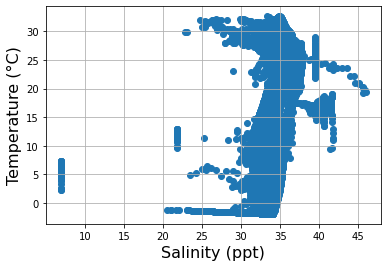

In [7]:
import warnings
warnings.filterwarnings('ignore')

ftsize=16

filename_t='thetao_Omon_CESM2_historical_r1i1p1f1_gr_201301-201412.nc'
data_t=xr.open_dataset(filename_t)

filename_s='so_Omon_CESM2_historical_r1i1p1f1_gr_201301-201412.nc'
data_s=xr.open_dataset(filename_s)




# get the info on the file to know what to select
# print(data)

theta0=data_t.thetao.isel(time=0,lev=1)
salt0=data_s.so.isel(time=0,lev=1)


plt.scatter(salt0,theta0,marker='o')
# add axes labels
plt.xlabel('Salinity (ppt)',fontsize = ftsize)
plt.ylabel('Temperature (°C)',fontsize = ftsize)

plt.grid(True)
plt.show()

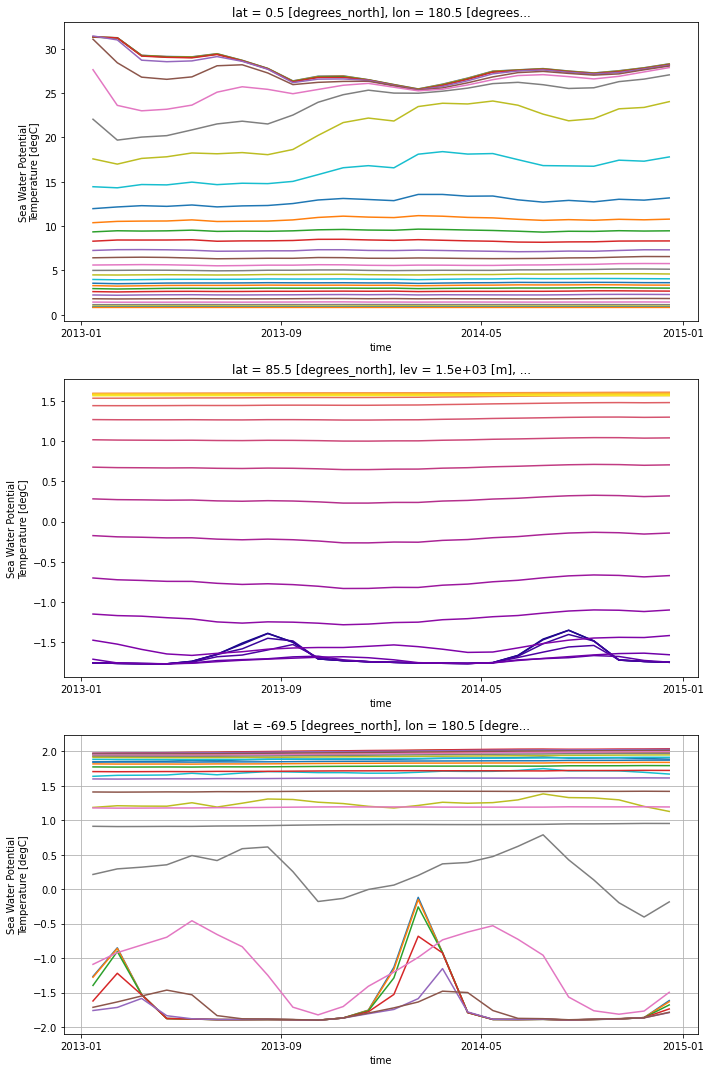

In [79]:
import seaborn as sns

import matplotlib as mpl
cmap = mpl.colormaps['plasma']
colors = cmap(np.linspace(0, 1, 25))


ftsize=16

filename_t='thetao_Omon_CESM2_historical_r1i1p1f1_gr_201301-201412.nc'
data_t=xr.open_dataset(filename_t)
depth=data_t.thetao.lev
time=data_t.thetao.time

# theta0=data_t.thetao.sel(lon=359.5,lat=75,method='nearest')
theta=data_t.thetao


# Temperature vs time plot - illustrates the "x" and "add_legend" kwargs


# using the variable axs for multiple Axes
fig, axes = plt.subplots(3,1,figsize=(10, 15))


#Equatorial Pacific
theta.isel(lon=180, lat=90).plot.line( x='time',hue='lev', add_legend=False,ax=axes[0])

#Arctic

for i in range(24):
    theta.isel(lon=180, lat=175,lev=i).plot.line( x='time', add_legend=True,ax=axes[1],color=colors[i])
    
#sns.move_legend(axes[1], loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)


#Antarctic
theta.isel(lon=180, lat=20).plot.line( x='time',hue='lev', add_legend=False,ax=axes[2])




plt.grid(True)
plt.tight_layout() 
plt.show()
